#Team Assignment


1.   Srinath Mannam
2.   Meghana Rao
3.   Govind



#Change the directory

In [63]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import os
working_directory = '/content/drive/My Drive/Colab Notebooks/OVGU/Deep_Learning/First_Assignment'
if os.getcwd() !=  working_directory:
  os.chdir(working_directory)
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/OVGU/Deep_Learning/First_Assignment'

#import statements

In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

##Check tensorflow version

In [66]:
tf.__version__

'2.6.0'

#Load Data

In [67]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [68]:
#Re-shape the dataset and then pass it to the function which creates data into batches
def reset_Data():
  return MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [69]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Visualize some images on some training and test data

1


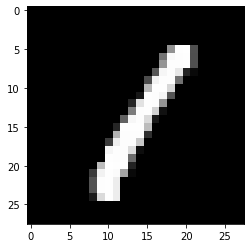

In [70]:
print(train_labels[3])
plt.imshow(train_images[3], cmap="Greys_r")

4


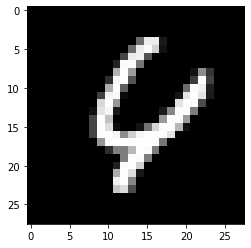

In [71]:
print(test_labels[121])
plt.imshow(test_images[121], cmap="Greys_r")

#Define a Generic function for training which uses relu activation function

In [72]:
def model_Train(_modelConfig, data):
  loss_list = []
  for step in range(_modelConfig["train_steps"]):
      img_batch, lbl_batch = data.next_batch()
      with tf.GradientTape() as tape:
          #loop that will goes forward for every hidden layer
          for ind in range(len(_modelConfig["_weights"])-1):
            if ind == 0:
              hPrevLogits = tf.matmul(img_batch, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
              hPrevOutput = tf.nn.relu(hPrevLogits)
            else :
              hcurrLogits = tf.matmul(hPrevOutput, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
              hcurrOutput = tf.nn.relu(hcurrLogits)
              hPrevOutput = hcurrOutput

          lastInd = len(_modelConfig["_weights"])-1

          #final output layer
          logits = tf.matmul(hcurrOutput, _modelConfig["_weights"][lastInd]) + _modelConfig["_biases"][lastInd]
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
              logits=logits, labels=lbl_batch))
          
      grads = tape.gradient(xent, [*_modelConfig["_weights"], *_modelConfig["_biases"]])

      #update weights
      for ind in range(len(_modelConfig["_weights"])):
        _modelConfig["_weights"][ind].assign_sub(_modelConfig["learning_rate"] * grads[ind])
      
      #update biases
      for ind in range(len(_modelConfig["_biases"])):
        _modelConfig["_biases"][ind].assign_sub(_modelConfig["learning_rate"] * grads[ind + len(_modelConfig["_biases"])])

      loss_list.append(xent)
      if not step % 100:
          print(step)
          preds = tf.argmax(logits, axis=1, output_type=tf.int32)
          acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                              tf.float32))
          print("Loss: {} Accuracy: {}".format(xent, acc))

  #Predict for Test Dataset
  for ind in range(len(_modelConfig["_weights"])-1):
      if ind == 0:
        hPrevLogits = tf.matmul(data.test_data, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
        hPrevOutput = tf.nn.relu(hPrevLogits)
      else :
        hcurrLogits = tf.matmul(hPrevOutput, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
        hcurrOutput = tf.nn.relu(hcurrLogits)
        hPrevOutput = hcurrOutput

  lastInd = len(_modelConfig["_weights"])-1
  test_preds = tf.argmax(tf.matmul(hcurrOutput, _modelConfig["_weights"][lastInd]) + _modelConfig["_biases"][lastInd], axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                              tf.float32))
  print("Test Accuracy: {}".format(acc))
  return loss_list

#Models

##Define params Model1

In [73]:
modelConfig1 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

##Define params Model2

In [74]:
modelConfig2 = {
    "train_steps" : 2000,
    "learning_rate" : 0.01,

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

#Models Training

In [75]:
models_Loss = []
print("Model1 Start")
models_Loss.append(model_Train(modelConfig1, reset_Data()))
print("Model1 End")
print("\n")
print("Model2 Start")
models_Loss.append(model_Train(modelConfig2, reset_Data()))
print("Model2 End")

Model1 Start
0
Loss: 2.3533966541290283 Accuracy: 0.0703125
100
Loss: 0.4071219861507416 Accuracy: 0.859375
200
Loss: 0.3011009395122528 Accuracy: 0.8984375
300
Loss: 0.25938481092453003 Accuracy: 0.9296875
400
Loss: 0.30072644352912903 Accuracy: 0.9296875
Starting new epoch...
500
Loss: 0.18300819396972656 Accuracy: 0.9375
600
Loss: 0.2538681924343109 Accuracy: 0.90625
700
Loss: 0.17672812938690186 Accuracy: 0.953125
800
Loss: 0.1232602670788765 Accuracy: 0.96875
900
Loss: 0.09482310712337494 Accuracy: 0.984375
Starting new epoch...
Test Accuracy: 0.9541000127792358
Model1 End


Model2 Start
0
Loss: 2.3319215774536133 Accuracy: 0.078125
100
Loss: 1.652337670326233 Accuracy: 0.65625
200
Loss: 1.0440467596054077 Accuracy: 0.8359375
300
Loss: 0.7548571825027466 Accuracy: 0.828125
400
Loss: 0.6165257692337036 Accuracy: 0.8203125
Starting new epoch...
500
Loss: 0.6381634473800659 Accuracy: 0.8359375
600
Loss: 0.5736104846000671 Accuracy: 0.875
700
Loss: 0.3846949338912964 Accuracy: 0.92968

#visualize the loss

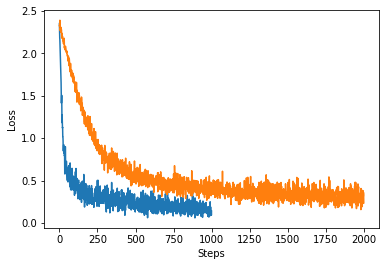

In [76]:
plt.plot(models_Loss[0], label='Model_1', linestyle='-')
plt.plot(models_Loss[1], label='Model_2')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()